In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
month = np.array([1,4,4,1,5,4,6,5,1])
month = sorted(month)
variance_data_abs = dict()
for obj in month:
  if obj in variance_data_abs:
    variance_data_abs[obj] += 1
  else:
    variance_data_abs[obj] = 1

print(variance_data_abs)

variance_data_rel = variance_data_abs
for obj in variance_data_abs.keys():
  variance_data_rel[obj] = variance_data_rel[obj] / len(month)

print(variance_data_rel)

{1: 3, 4: 3, 5: 2, 6: 1}
{1: 0.3333333333333333, 4: 0.3333333333333333, 5: 0.2222222222222222, 6: 0.1111111111111111}


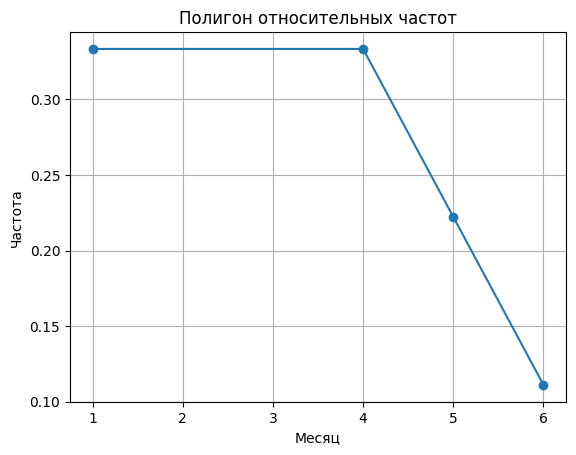

In [ ]:
plt.plot(variance_data_rel.keys(), variance_data_rel.values(), marker='o')
plt.xlabel('Месяц')
plt.ylabel('Частота')
plt.title('Полигон относительных частот')
plt.grid(True)
plt.show()

In [ ]:
def f(data, n): #эмирическая функция распределения
  elements = [obj for obj in data if obj <= n]
  return len(elements)/len(data)

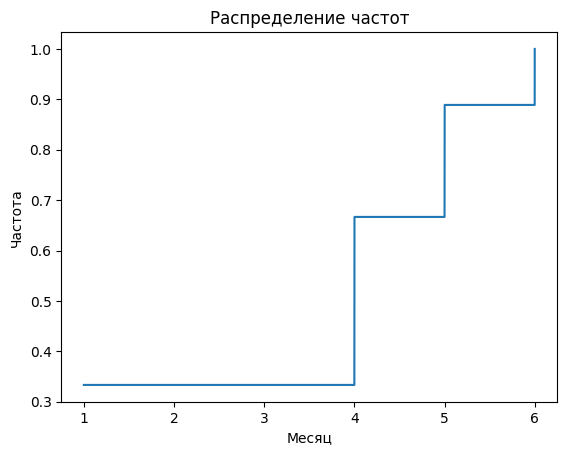

In [ ]:
points = np.linspace(min(data), max(data), num=10000)
cdf_values = [f(data, point) for point in points]

plt.plot(points, cdf_values)
plt.xlabel('Месяц')
plt.ylabel('Частота')
plt.title('Распределение частот')
plt.show()

In [ ]:
mean = np.mean(data)
variance = np.var(data)
std_dev = np.std(data)
median = np.median(data)
cv = std_dev / mean
print(f"Выборочное среднее: {mean}")
print(f"Выборочная дисперсия: {variance}")
print(f"Выборочное стандартное отклонение: {std_dev}")
print(f"Выборочная медиана: {median}")
print(f"Коэффициент вариации: {cv}%")

Выборочное среднее: 3.4444444444444446
Выборочная дисперсия: 3.3580246913580245
Выборочное стандартное отклонение: 1.8324913891634047
Выборочная медиана: 4.0
Коэффициент вариации: 0.5320136291119562%


In [ ]:
height = np.array([1.95,1.97,1.81,1.86,1.8,1.82,1.82,1.75,1.8])
height = sorted(height)
height

[1.75, 1.8, 1.8, 1.81, 1.82, 1.82, 1.86, 1.95, 1.97]

In [ ]:
m = round(1 + math.log(len(height)))
print(f"Число интервалов: {m}")

Число интервалов: 3


In [ ]:
m2 = 1 + 3.332 * math.log10(len(height))
m2

4.17953604145183

In [ ]:
h = (max(height) - min(height)) / m
h

0.07333333333333332

In [ ]:
sturges = [round(min(height) - h/2,2)]

for i in range(1,m+1):
  sturges.append(round(sturges[i-1] + h,2))

sturges

[1.71, 1.78, 1.85, 1.92]

Вариационный ряд:
   Height     Interval
0    1.75  1.71 - 1.78
1    1.80  1.78 - 1.85
2    1.80  1.78 - 1.85
3    1.81  1.78 - 1.85
4    1.82  1.78 - 1.85
5    1.82  1.78 - 1.85
6    1.86  1.85 - 1.92
7    1.95      >= 1.85
8    1.97      >= 1.85


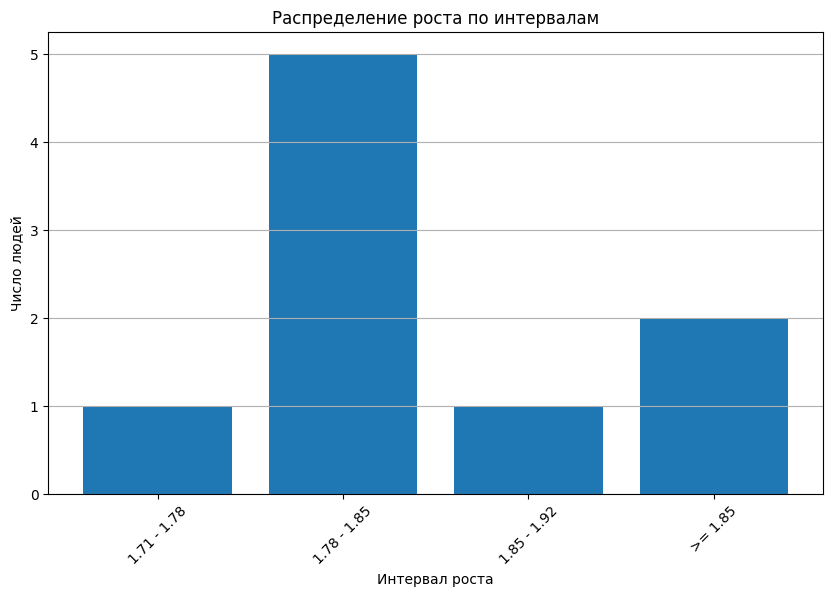

Вариационный ряд:
      Interval  Count
0  1.71 - 1.78      1
1  1.78 - 1.85      5
2  1.85 - 1.92      1
3      >= 1.85      2


In [ ]:
interval_indices = np.digitize(height, bins=sturges, right=True)

intervals = [f"{sturges[i]} - {sturges[i+1]}" for i in range(len(sturges) - 1)]

df = pd.DataFrame({
    'Height': height,
    'Interval': [
        intervals[i-1] if 1 <= i <= len(intervals) else
        f">= {sturges[-2]}"
        for i in interval_indices
    ]
})

grouped = df.groupby('Interval').size().reset_index(name='Count')

print("Вариационный ряд:")
print(df.sort_values(by='Height'))

plt.figure(figsize=(10, 6))
plt.bar(grouped['Interval'], grouped['Count'])
plt.title('Распределение роста по интервалам')
plt.xlabel('Интервал роста')
plt.ylabel('Число людей')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

df_with_counts = df.merge(grouped, on='Interval')

print("Вариационный ряд:")
print(grouped)

      Interval  Count  Relative
0  1.71 - 1.78      1  0.111111
1  1.78 - 1.85      5  0.555556
2  1.85 - 1.92      1  0.111111
3      >= 1.85      2  0.222222


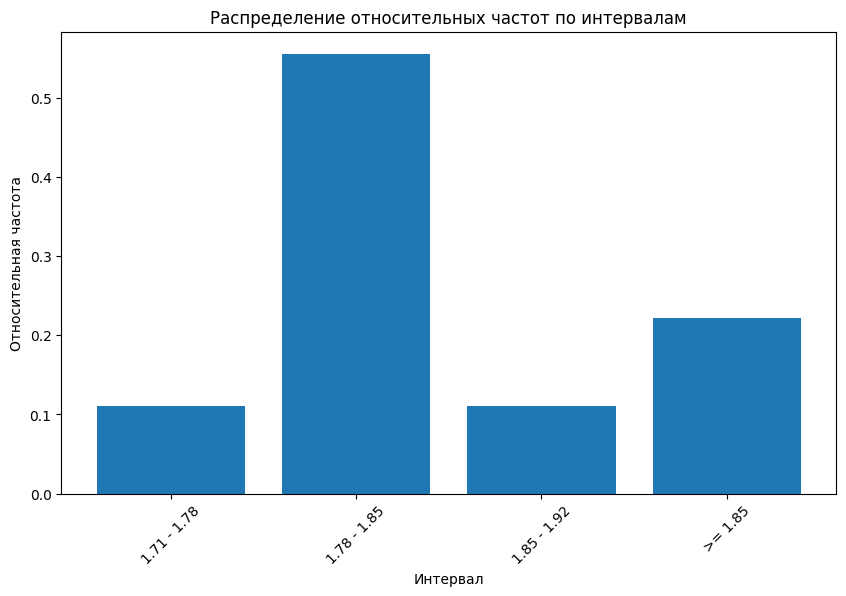

In [ ]:
grouped['Relative'] = grouped['Count'] / len(height)

print(grouped)

plt.figure(figsize=(10, 6))

plt.bar(grouped['Interval'], grouped['Relative'])

plt.title('Распределение относительных частот по интервалам')
plt.xlabel('Интервал')
plt.ylabel('Относительная частота')
plt.xticks(rotation=45)

plt.show()

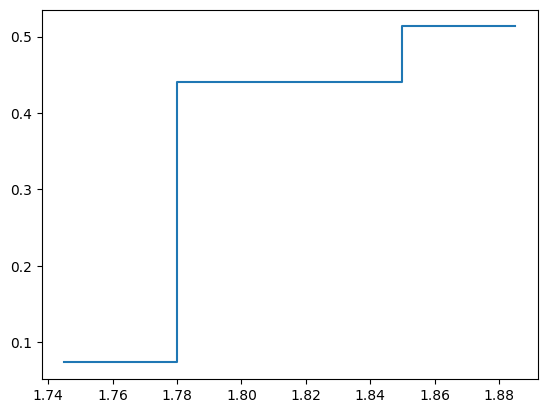

In [ ]:
bin_centers = [(sturges[i] + sturges[i + 1]) / 2 for i in range(len(sturges) - 1)]
hist, _ = np.histogram(height, bins=sturges)
cdf = np.cumsum(hist) * h

plt.step(bin_centers, cdf, where='mid')
plt.show()


In [ ]:
mean = np.mean(height)
variance = np.var(height)
std_dev = np.std(height)
median = np.median(height)
cv = (std_dev / mean)

print(f"Выборочное среднее: {mean}")
print(f"Выборочная дисперсия: {variance}")
print(f"Выборочное стандартное отклонение: {std_dev}")
print(f"Выборочная медиана: {median}")
print(f"Коэффициент вариации: {cv}")

Выборочное среднее: 1.842222222222222
Выборочная дисперсия: 0.00470617283950617
Выборочное стандартное отклонение: 0.0686015512908139
Выборочная медиана: 1.82
Коэффициент вариации: 0.037238477781503326
